# Load Dataset from Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
# !unzip  drive/Shareddrives/Bangkit\ Capstone/leaf_datasets.zip -d .

Mounted at /content/drive


# Import Libraries

In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
import glob as gb
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [11]:
def list_images():
  classes_dirs = os.listdir(train_dir)
  for folder in classes_dirs:
    train_classes = os.listdir(os.path.join(train_dir, folder))
    validation_classes = os.listdir(os.path.join(validation_dir, folder))
    test_classes = os.listdir(os.path.join(test_dir, folder))
    print(f"{folder}: \n \t{len(train_classes)} train images, {len(validation_classes)} validation images, and {len(test_classes)} test images,  total {len(train_classes) + len(validation_classes) + len(test_classes)} images")
    print()
list_images()

Mint: 
 	302 train images, 85 validation images, and 45 test images,  total 432 images

Jeruk Purut: 
 	135 train images, 38 validation images, and 21 test images,  total 194 images

Kelor: 
 	153 train images, 43 validation images, and 23 test images,  total 219 images

Bayam Hijau: 
 	206 train images, 58 validation images, and 31 test images,  total 295 images

Nangka: 
 	109 train images, 31 validation images, and 16 test images,  total 156 images

Lemon: 
 	151 train images, 42 validation images, and 23 test images,  total 216 images

Kersen: 
 	81 train images, 23 validation images, and 13 test images,  total 117 images

Jahe: 
 	320 train images, 91 validation images, and 47 test images,  total 458 images

Pepaya: 
 	168 train images, 47 validation images, and 25 test images,  total 240 images

Lengkuas: 
 	72 train images, 20 validation images, and 11 test images,  total 103 images

Jambu Biji: 
 	154 train images, 44 validation images, and 23 test images,  total 221 images



In [ ]:
# Load the first example of a horse
pepaya_class = os.path.join(train_dir, 'Pepaya')
sample_image  = load_img(f"{os.path.join(pepaya_class, os.listdir(pepaya_class)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (500, 500, 3)


In [16]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255. )

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='sparse',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale = 1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='sparse',
                                                                target_size=(224, 224))

  test_datagen = ImageDataGenerator(rescale= 1/255.)

  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=32, 
                                                                class_mode='sparse',
                                                                target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [17]:
train_generator, validation_generator, test_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 1790 images belonging to 11 classes.
Found 497 images belonging to 11 classes.
Found 261 images belonging to 11 classes.


In [29]:
from tensorflow.keras.optimizers import Adam, RMSprop
def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
  ])

  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    

  return model

In [30]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 26, 26, 64)      

In [31]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
56/56 [==============================] - 646s 12s/step - loss: 2.0408 - accuracy: 0.2911 - val_loss: 1.6956 - val_accuracy: 0.4567
Epoch 2/15
56/56 [==============================] - 70s 1s/step - loss: 1.4722 - accuracy: 0.5101 - val_loss: 1.3673 - val_accuracy: 0.5573
Epoch 3/15
56/56 [==============================] - 70s 1s/step - loss: 1.2028 - accuracy: 0.5888 - val_loss: 1.3149 - val_accuracy: 0.5573
Epoch 4/15
56/56 [==============================] - 70s 1s/step - loss: 1.1329 - accuracy: 0.6145 - val_loss: 1.2856 - val_accuracy: 0.5714
Epoch 5/15
56/56 [==============================] - 70s 1s/step - loss: 1.0375 - accuracy: 0.6676 - val_loss: 1.3562 - val_accuracy: 0.5875
Epoch 6/15
56/56 [==============================] - 70s 1s/step - loss: 0.8424 - accuracy: 0.7184 - val_loss: 1.4669 - val_accuracy: 0.5875
Epoch 7/15
56/56 [==============================] - 70s 1s/step - loss: 0.7293 - accuracy: 0.7559 - val_loss: 1.5993 - val_accuracy: 0.5392
Epoch 8/15
56/56 [

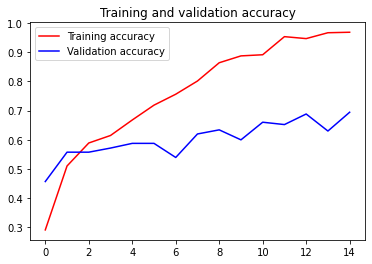

<Figure size 432x288 with 0 Axes>

In [32]:
def plot_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  
  plt.show()

plot_loss(history)

In [50]:
# X_test, y_test = test_generator.next()
# print('Loss of the model is - ', model.evaluate(X_test, y_test)[0])
# print('Accuracy of the model is - ', model.evaluate(X_test, y_test)[1]*100, '%')
evaluate = model.evaluate(test_generator)
print('Loss of the model is - ', evaluate[0])
print('Accuracy of the model is - ', evaluate[1]*100, '%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Loss of the model is -  1.968740463256836
Accuracy of the model is -  72.03065156936646 %


In [ ]:
def load_image(img_path, show=False):

    img = load_img(img_path, target_size=(150, 150))
    img_tensor = img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

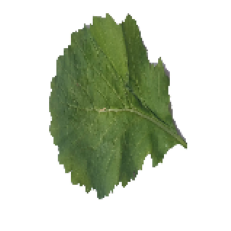

Sawi India


In [ ]:
label_map = (train_generator.class_indices)
label_map = {v: k for k, v in label_map.items()}
image_path ='/content/Segmented Medicinal Leaf Images/test/Sawi India/BJ-S-010.jpg'
image = load_image(image_path, show=True)
print(label_map[np.argmax(model.predict(image))])

In [ ]:
image = load_img('/content/Segmented Medicinal Leaf Images/test/Bayam Hijau/AV-S-009.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7EFCCAC16990>
